Data Size:  (18490, 9)
Train size (14792, 8) and Test Size (3698, 8)
Confusion Matrix : 
 [[3040   53]
 [  39  566]]
----------------------------------------------
Precision Average:  0.9654327182472515
Reccall  Average:  0.9683460903983488
F1 :  0.966887209724004
----------------------------------------------
Accuracy :  0.9751216873985938
Report 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3093
           1       0.91      0.94      0.92       605

    accuracy                           0.98      3698
   macro avg       0.95      0.96      0.95      3698
weighted avg       0.98      0.98      0.98      3698



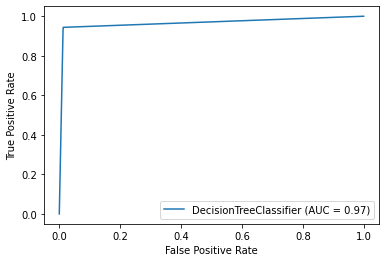

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

scoring = ['precision_macro', 'recall_macro']

df = pd.read_csv('balance_data2.csv')

print('Data Size: ',df.shape)

X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

print('Train size {} and Test Size {}'.format(X_train.shape , X_test.shape))

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores = cross_validate(clf, X, Y,scoring = scoring,cv=RepeatedKFold(n_splits=10,n_repeats=10))

y_predd = cross_val_predict(clf, X_test, y_test, cv=10)
conf_mat = confusion_matrix(y_test, y_predd)

a = (np.mean(scores['test_precision_macro'])*np.mean(scores['test_recall_macro']))
b = (np.mean(scores['test_precision_macro'])+np.mean(scores['test_recall_macro']))
f1 = 2*(a/b)

print('Confusion Matrix : \n',conf_mat)
print('----------------------------------------------')
print('Precision Average: ', np.mean(scores['test_precision_macro']))
print('Reccall  Average: ', np.mean(scores['test_recall_macro']))
print('F1 : ',f1)
print('----------------------------------------------')
print('Accuracy : ', metrics.accuracy_score(y_test,y_predd))
print('Report \n\n',classification_report(y_test,y_predd))

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show() 

In [14]:
pre_test = clf.predict([X_test[1]]) # 0 --> row number in test data
if pre_test[0] == 1:
    print('Dropout')
else:
    print('Non-dropout')

Dropout


In [5]:
fig = plt.figure(figsize=(200,250))
_ = tree.plot_tree(clf, 
                   feature_names=list(df.columns),  
                   class_names=[str(i) for i in list(df[df.columns[-1]])],
                   filled=True)

In [3]:
fig.savefig("decistion_tree.png")